# Qiskit
## Cinco elementos principais
- Terra: contem elementos fundamentais que sao usados para escrever os circuitos quanticos
- Aer: contem os recursos para as simulaçoes quanticas por meio de computaçao de alto desempenho
- AQUA: Fornece alguns algoritmos ja programados para aplicaçao em certas areas, como finanças
- Ignis: Contem as ferramentas especificas para correçao de erro, como ruido quantico e verificaçao de hardware
- IBM Q Provider: Não é exatamente um elemento fundamental, mas fornece as ferramentas par acessar o IBM Q Experience, que permite executar os algoritmos quanticos.

## Bits quanticos (Qubits)
- bit é a menor unidade de informaçao na computaçao classica
    - Assume dois valores possiveis, 0 ou 1
    - Implementado em componentes eletronicos de dois estados, com dois niveis de luz, estados eletricos e etc
    - Computadores manipulam bytes(conjuntos de bits, normalmente 8)
- Qubits
    - podem ser representados por uma combinaçao linear da base ortonormal de um sistema quantico de dois niveis
        - Basicamente, apesar do sistema estar em um sistema de dois niveis, ele também pode estar em uma "mistura"(combinaçao linear) desses estados.
                - Famosa Superposiçao
        - Ortonormal é porque é um conjunto de estados que estao independentes e que server como base para descrever qualquer outro estado do sistema
        - Basicamente, tem 2 estados, mas pode ter uma parte em um, outra em outro, estar nos dois ao mesmo tempo
                - Foge da computaçao normal, e ai que vem a superposiçao quantica da computaçao quantica.
    - Representada como {|0>, |1>}
        - ![image.png](imagens/representacao-matricial-superposicao.png)
    - No fim, a principal vantagem dos Qubits para os bits normais é a capacidade de superposiçao, que possibilita combinaçoes lineares entre os vetores da base computacional.
    - A representaçao mais geral para um Qubit é um vetor definido no espaco de Hilbert
        -   Espaço de hilbert é um espaço vetorial(basicamente um playground de vetores) que vem com os conceitos de distancia e angulos, mas nao tem buracos, podendo ter infinitas dimensoes
            - ![hilbert.png](imagens/hilbert.png)
        - Tem dois numeros, sendo `α` e `β`, que mostram a tendencia aos estados `|0>` e `|1>`. Ao forçar uma decisao(medir), a chance de virar `|0>` e de `|a|^2` e de virar `|1>` é de `|b|^2`. Tendo que somar em 100% no fima


## Primeiros passos com Qiskit
Após fazer a importaçao das bibliotecas necessarias


In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
# from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

Com isso, temos as condiçoes necessarias para desenvolver um conjunto de regras ou operaçoes, que aplicadas nos Qubits, permitem solucionar problemas preestabelecidos, ou algoritmos quanticos.

Primeiro passo disso é definir as bases do circuito, que ira implementar o algoritmo desejado. Começando pelo conjunto de qubits que sera usado.

In [2]:
N_BITS_QUBITS = 8

registered_qubits = QuantumRegister(N_BITS_QUBITS, 'q')

# N = 8 inicialmente

Outro elemento importante é a definiçao dos conjuntos de bits classicos. Onde vamos registrar as informaçoes vindas das medidas realizadas por Qubits depois de executar algum programa.

In [3]:
registered_bits = ClassicalRegister(N_BITS_QUBITS, 'b')

Agora podemos definir a varivel circuito, que vai usar os conjuntos de Qubits e Bits que estamos definindo

In [4]:
circuit = QuantumCircuit(registered_qubits, registered_bits)

Neste momento, temos todas a base para o nosso circuito, e condiçoes para definir os tres componentes principais para os algoritmso quanticos
1. Inicializaçao: precisamos iniciar o nosso processo de computaçao em um estado bem definido?
2. Portas quanticas: Em seguida, vamos aplicar as sequencias de operaçoes(portas) quanticas que vao permitir solucionar o problema preestabelecido
3. Medidas: No fim, medidos o resultado de cada qubit, registramos no bit normal e então interpretamos os resultados atraves de distribuiçoes de probabilidade correspondente a cada resultado de medida?

### Inicializaçao
Usando a biblioteca Qiskit podemos definir os coeficientes `α` e `β` e inicializar cada qubit do circuito.

#### Esfera de Bloch
Uma das representaçoes uteis para o estado de um qubit, é a representaçao aonde é utilizado os componentes `⍺` e `β` como funçoes de angulos theta e phi, `θ` e `ɸ`. Como `alpha` e `beta` seguem a condiçao de normalizaçao `|alpha|^2 + |beta|^2 = 1`, a equaçao pode ser rescrita como.
![formula-cos-sin.png](imagens/formula-cos-sin.png)

Neste caso, o par {theta, phi} um ponto em uma esfera de raio unitario, que seria a Esfera de Bloch. Que fornece a representaçao geometrica para o espaço de Hilbert de um qubit, neste caso, sendo um ponto na superficie da esfera de Bloch e estados ortogonais sao diametralmente opostos`?`.

Usando o pacote `qiskit.visualization`, podemos usar a funçao `plot_bloch_multivector` para obter a visualizaçao na esfera de Bloch.

Assim, apos escolher o par de `{theta, phi}` na equaçao, podemos obter a representaçao geometrica do qubit que esta descrito por `|ψ>.`(funçao de onda`?`)

In [5]:
for i in range(3):
    theta = (float(input("Insira o angulo theta(graus): "))) * np.pi / 180
    phi = (float(input("Insira o angulo phi(graus): "))) * np.pi / 180

    alpha = np.cos(theta / 2)
    beta = (np.exp(1j * phi)) * np.sin(theta / 2)

    state = [alpha, beta]
    circuit.initialize(state, registered_qubits[i])

    # 3 casos
    # superposicao perfeita theta = 90 phi = 0
    # certeza no estado 1: theta = 180, phi = 0
    # superposicao imaginaria: theta = 90, phi = 90 | beta vai ser um numero imaginario

Agora, podemos usar o elemento Aer para simular o estado que foi inicializado em nosso computador local.

E entao, obter o vetor de estado e plota-lo na representaçao da esfera de Bloch, usando o `plot_bloch_multivector`

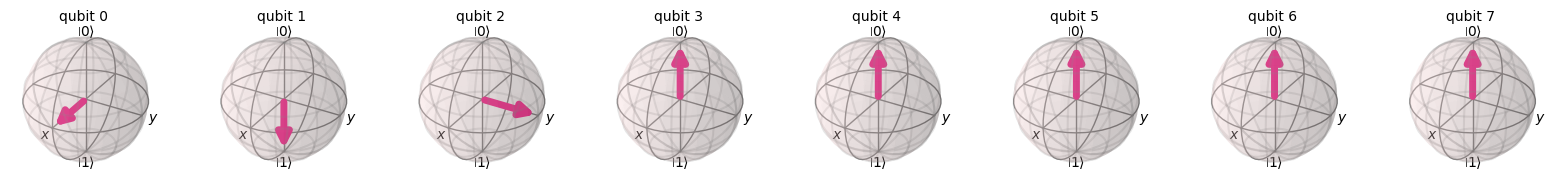

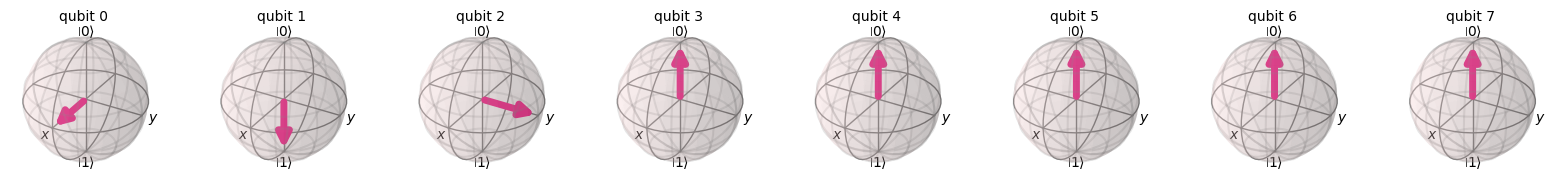

In [6]:
state_vector = Statevector(circuit)  # basicamente, pega o vetor de estados desse circuito
# o qiskit vai cuidar da simulaçao pra mim
plot_bloch_multivector(state_vector)

##### A esfera de Bloch
A esfera de Bloch é como um mapa visual do estado de um Qubit. Como a descriçao de um Qubit, matematicamente é abstrata, usando dois numeros complexos, fica dificil visualizar. No caso, a esfera de Bloch, traduz isso para algo que nosso cerebro pode entender, no caso, uma esfera, apontando pra algum lado no espaço 3d.

1. No caso, cada ponto na superficie ele mostra um possivel estado quantico para o qubit, em vez da formula, vc tem o mapa das possibilidades.
2. Intuiçao sobre os estados: Você pode ver o estado, no caso, uma seta apontando pra cima é `|0>`, uma seta apontando para baixo é `|1>` e no meio seria um superposiçao de 50/50.
3. Intuiçao sobre operaçoes: As portas quanticas(operaçoes) deixam de ser apenas multiplicaçoes de matrizes, eles se tornam **rotaçoes** em uma esfera. No caso, uma porta X, por exeplo, è uma rotaçao de 180 graus em torno do eixo X. No caso, você pode, inves de calcular e etc, apenas imaginar as setas rodando.

##### Porque isso funciona?
Existe uma correspondencia matematica perfeita entre a descriçao de um qubit e os pontos na superficie da esfera.

1. O estado do qubit é definido por dois numeros complexos, sendo `alpha` e `beta`
2. Estes numeros, tem uma restriçao, que no caso, as somas de suas probabilidades tem que ser 1: $$(∣\alpha∣^2 + ∣\beta∣^2 = 1).$$
3. Existe o conceito de "fase global", que permite simplificar a descriçao para mostrar que 2 numeros reais podem definir unicamente o estado de um qubit.
4. No caso, definido por 2 numeros reais também temos um ponto na superficie de um globo. Que no caso sao latitute e longitude, no nosso caso, theta e phi



### Portas quânticas
Após definir esta base que precisamos(qubits, circuitos e etc), temos todas as condições de implementar as operações que vão ser aplicadas sobre eles.

Para seguir com este topico, precisamos lembrar com a computação classica difere da computaçao quantica. Na computaçao classica, estas "operações" são chamadas de Portas Logicas Classicas, que seguem a Algebra Booleana, e são implementadas a partir de circuitos eletronicos, que permitem a implementaçao de alguma operaçao logica em cima de alguma operaçao booleana.

Já na computaçao quantica, existem as Portas Logicas Quanticas, ou apenas Portas Quanticas, que são o equivalente as portas logicas da computaçao classica, operando em cima do qubits, porém, ao contrario das classicas, as portas logicas quanticas sao sempre reversiveis(na classica, apenas a not é). Isso ocorre porque todas elas são descritas por uma um operador unitario $U$ que obedece à relação $U†U = 𝟙$, sendo $𝟙$ a matriz identidade

- Portas reversiveis (anotaçao/explicaçao extra)
    - Exemplo classico: AND.
        - Se o resultado de saida for 0, a entrada pode ser, 0 e 0, 1 e 0, 0 e 1. Mas voce não consegue saber disso(a entrada), porque é uma rota de mão unica.
    - Exemplo quantico(reversivel):
        - Porta Hadamard(pegar estado de certeza `|1>` e transformar em superposiçao perfeita).
            - A logica do porque ela é reversivel é porque caso voce aplique duas vezes a mesma operaçao ela volta ao resultado inicial. Ou seja: $H * H = 1$
                - Ou seja, começa no estado de certeza `|0>`. Aplica Hadamard e vai para `|+>`(superposiçao), e aplica de novo vai para o estado inicial de volta.
    - Todas as portas quanticas é possivel "voltar" e ver o estado inicial.

- Formula: $U†U = 𝟙$ (anotaçao/explicaçao extra)
    - U seria o operador unitario. Ou seja, uma matriz que representa a porta quantica, como mostrado abaixo na imagem.
    - 𝟙 (Matriz identidade): Operaçao de "não fazer nada", basicamente multiplicar por 1. Nao muda o estado do qubit: A matriz identidade de 2x2 é:
        $$ 1 = \begin{pmatrix}
            1 & 0 \\
            0 & 1
            \end{pmatrix}
        $$
        - Qualquer matriz multiplicada pela matriz identidade continua o mesmo(igual 5x1).
        - Tem 1 na diagonal principal e o resto é 0
    - A cruz, tambem chamada de adaga, é o simbolo para a operaçao inversa de U. Como se fosse um Ctrl+Z da porta quantica. Ela desfaz perfeitamente o que a porta U fez.
        - Matematica é a "transposta conjugada"
    - Ao juntar tudo:
        -  Aplicar a operaçao U, e em seguida aplica a sua operaçao inversa, é o mesmo de nao ter feito nada(matriz identidade).

Em seguida, vamos estudar as principais portas quanticas.

#### Portas de 1 qubit
Iniciar com a porta quantica de 1 qubit, também conhecida como portas quanticas elementares, ou portas de Pauli, correspondentes com as matrizes de Pauli
![matriz-pauli.png](imagens/matriz-pauli.png)

Considerando a equaçao apresentada na representaçao de um Qubit, a atuaçao das portas neste estado é:
![atuacao-eqa.png](imagens/atuacao-eqa.png)

Neste caso, pode-se perceber que as portas de Pauli correspondem a uma rotaçao na esfera de Bloch de $\pi$ rad no eixo da direçao apresentada pela porta

- Matriz de Pauli, Portas de Pauli
    - Representaçao
        - O qubit é representado pela formula ja apresentado, que seria um Vetor Coluna, sendo o numero de cima a "quantidade" do estado `|0>` e o de baixo a de `|1>`
            $$ ∣ψ⟩ → \begin{pmatrix} α \\ β \end{pmatrix} $$
        - A porta, seria a açao, ou seja, a porta quantica (X, Y ou Z) que é representada por uma matriz de 2x2.
        - Neste caso, seria multiplicaçao de Matrizes por Vetores a atuaçao destas portas neste estado.
    - Desvendando portas
        - Porta X("Flipadora", NOT Quantico)
            - Inverte o estado do qubit, o que era `|0>` vira `|1>` e vice versa.
                $$
                    X |\psi\rangle \quad \rightarrow \quad \underbrace{\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}}_{\text{Matriz X}} \underbrace{\begin{pmatrix} \alpha \\ \beta \end{pmatrix}}_{\text{Vetor } |\psi\rangle}
                $$
                - Então, multiplicamos linha por coluna:
                    - Para linha de cima: $(0 * \alpha) + (1 * \beta) = \beta$
                    - Para a linha de baixo: $(1 * \alpha) + (0 * \beta) = \alpha$
                - Vetor resultante
                    $$
                        \begin{pmatrix} \beta \\ \alpha \end{pmatrix}
                    $$
                - Agora, precisamos traduzir este vetor de volta para a notaçao quantica. O valor de cima é a nova amplitude de `|0>` e o de baixo a nova amplitude de `|1>`
                    $$
                        \beta|0\rangle + \alpha|1\rangle
                    $$
                - Que refleta a equaçao mostrada na imagem.
        - Porta Z ("Inversora de fase")
            - Inverte a fase(sinal) da parte uma das partes `|1>` ou `|0>`, mas deixando a outra intacta.
                - Imagine um vetor que pode apontar pra frente e tras. No caso, a porta Z inverte um dos pontos do vetor.
            $$
                Z |\psi\rangle \quad \rightarrow \quad \underbrace{\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}}_{\text{Matriz Z}} \underbrace{\begin{pmatrix} \alpha \\ \beta \end{pmatrix}}_{\text{Vetor } |\psi\rangle}
            $$
            - Multiplicando:
                - Linha de cima: $(1 * \alpha) + (0 * \beta) = \alpha$
                - Linha de baixo: $(0 * \alpha) + (-1 * \beta) = -\beta$
            - Resultando em:
                $$
                    \begin{pmatrix} \alpha \\ -\beta \end{pmatrix}
                $$
                $$
                    \alpha|0\rangle - \beta|1\rangle
                $$
        - Porta Y ("Complexa")
            - Faz o trabalho da X e Z ao mesmo tempo, ou seja, inverte o estado e a fase do qubit.
                - Como se um botão da luz não so ligasse e desligasse, mas tambem trocasse a cor.
            $$
                Y |\psi\rangle \quad \rightarrow \quad \underbrace{\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}}_{\text{Matriz Y}} \underbrace{\begin{pmatrix} \alpha \\ \beta \end{pmatrix}}_{\text{Vetor } |\psi\rangle}
            $$
            - Multiplicando:
                - Linha de cima: $(0 * \alpha) + (-i * \beta) = -i\beta$
                - Linha de baixo: $(i * \alpha) + (0 * \beta) = i\alpha$
            - Resultando em:
                $$
                    -i\beta|0\rangle + i\alpha|1\rangle
                $$
OBS: calculos no caderno

##### Porta NOT(X)
Usando Qiskit, podemos verificar a atuação dessas portas em um qubit genérico, a seguir vamos verificar a atuação da porta nos estados base computacional {`|0>` e `|1>`



Antes da aplicaçao de NOT


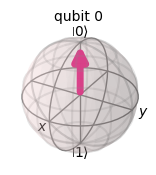

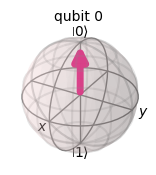

In [7]:
qNot = QuantumRegister(1, 'q')  # Reserva o espaço para 1 Qubit.
circuitNot = QuantumCircuit(qNot)  # Cria o circuito que vai operar nesse Qubit
initial_not = [1, 0]  # Define o estado inicial, alpha e beta
circuitNot.initialize(initial_not, qNot)  # Injeta este estado no qubit
print("Antes da aplicaçao de NOT")
state_vector_not = Statevector(circuitNot)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_not, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Apos aplicaçao de NOT


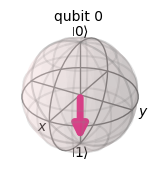

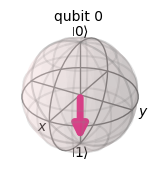

In [8]:
circuitNot.x(qNot)  # aplica a porta X (NOT)
print("Apos aplicaçao de NOT")
state_vector_not = Statevector(circuitNot)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_not, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Como é possivel validar ao executar o código. A porta X atua como um inversor logico, negando o valor de entrada, parecida com a porta NOT classica, por isso é chamada de NOT quantica.

Agora, para a aplicaçao das portas Y e Z

Antes da aplicaçao de Z(Inversora de fase) e Y (X e Z juntas)


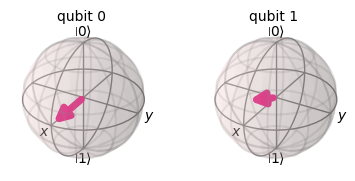

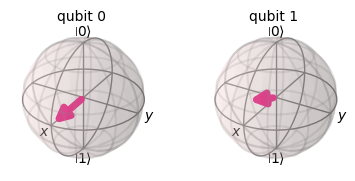

In [9]:
qZY = QuantumRegister(2, 'q')  # Reserva o espaço para 1 Qubit.
circuitZY = QuantumCircuit(qZY)  # Cria o circuito que vai operar nesse Qubit
val = 1 / np.sqrt(2)
initial_Z = [val, val]  # Define o estado inicial, alpha e beta
initial_Y = [np.sqrt(0.7), np.sqrt(0.3)]  # Define o estado inicial, alpha e beta
circuitZY.initialize(initial_Z, qZY[0])  # Injeta este estado no qubit
circuitZY.initialize(initial_Y, qZY[1])  # Injeta este estado no qubit
print("Antes da aplicaçao de Z(Inversora de fase) e Y (X e Z juntas)")
state_vector_ZY = Statevector(circuitZY)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(circuitZY, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Apos aplicaçao de Z(Inversora de fase) e Y (X e Z juntas)


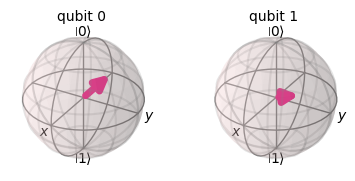

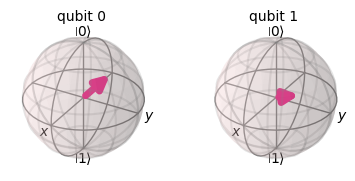

In [10]:
circuitZY.z(qZY[0])  # aplica a porta Z
circuitZY.y(qZY[1])  # aplica a porta Y
print("Apos aplicaçao de Z(Inversora de fase) e Y (X e Z juntas)")
state_vector_ZY_af = Statevector(circuitZY)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_ZY_af, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Podemos notar que, o Qubit iniciado em superposição, apontando para o eixo X, após a aplicaçao da porta X, foi alterado para o eixo -X, invertendo a fase.

Já no segundo Qubit, podemos ver que ele inverte tanto a fase como o valor do qubit, que antes seria de 70% de `|0>` e 30% de `|1>`

Nota: Caso queira fazer alteraçoes e testar por si mesmo, ai vai uma dica.

Caso queira controlar aonde o ponteiro vai estar, ou as probabilidades de mediçao num geral. Lembre-se das regras fundamentais: $$(∣\alpha∣^2 + ∣\beta∣^2 = 1).$$

Ou seja, para definir que o Qubit vai estar em um estado de 70/30 você precisa:
- Definir a probabilidade
    - P(0) = 70
    - P(1) = 30
- Calcular o decimal
    - P(0) = 0.7
    - P(1) = 0.3
- Fazer a raiz quadrada de ambos
    - $\alpha$ = `np.sqrt(0.7)`
    - $\beta$ = `np.sqrt(0.3)`
- E por fim passar esses valores como estado inicial do qubit.

##### Porta Hadamard (H)
Outra porta importante que atua sobre 1 qubit é a porta Hadamard (H)
$$ H = \frac{1}{\sqrt{2}} (X + Z) = \frac{1}{\sqrt{2}}
    \begin{pmatrix}
        1 & 1 \\
        1 & -1
    \end{pmatrix}
$$

Ela é importante, pois a aplicaçao da porta Hadamard resulta na criaçao de uma superposiçao. Considerando os estados da base computacional, a atuaçao da porta Hadamard resulta em:
$$ H|0> = |+> = \frac{1}{\sqrt{2}}(|0> + |1>) $$

$$ H|0> = |-> = \frac{1}{\sqrt{2}}(|0> - |1>) $$

Neste caso, a aplicaçao da porta Hadamard é feita pela multiplicaçao das matrizes, e o $\frac{1}{\sqrt{2}}$ é o fator de normalizaçao, para que no fim, a soma das duas probabilidades resulte em 100%.

- Aplicando H em `|0>`(para criar o estado `|+>`
    - Para o estado `|0>` é o vetor de $\begin{pmatrix}1\\0\end{pmatrix}$.
        $$
            H |0\rangle \quad \rightarrow \quad \frac{1}{\sqrt{2}}
                \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
                \begin{pmatrix} 1 \\ 0 \end{pmatrix}
        $$
    - Aplicando a multiplicaçao de matrizes:
        $$
            \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
                \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} (1 \cdot 1) + (1 \cdot 0) \\ (1 \cdot 1) + (-1 \cdot 0) \end{pmatrix}
                     = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
        $$
    - Resultando em:
        $$
            \frac{1}{\sqrt{2}} (1|0\rangle + 1|1\rangle) = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
        $$
- Aplicando H em `|1>`(para criar o estado `|->`
    - Para o estado $|1\rangle$, o vetor é $\begin{pmatrix} 1\\0 \end{pmatrix}$
        $$
            H |1\rangle \quad \rightarrow \quad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix}
        $$
    - Aplicando a multiplicaçao de matrizes:
        $$
            \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} (1 \cdot 0) + (1 \cdot 1) \\ (1 \cdot 0) + (-1 \cdot 1) \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \end{pmatrix}
        $$
    - Resultando em:
        $$
            \frac{1}{\sqrt{2}} (1|0\rangle - 1|1\rangle) = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
        $$


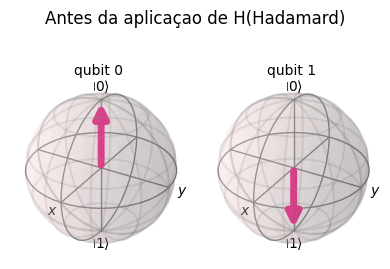

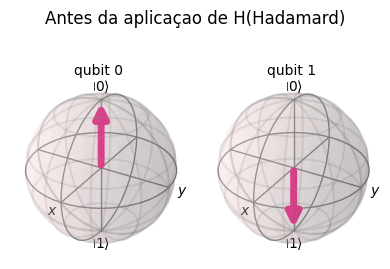

In [11]:
qH = QuantumRegister(2, 'q')
circuitH = QuantumCircuit(qH)  # Cria o circuito que vai operar nesse Qubit
initial_0 = [1, 0]  # |1>
initial_1 = [0, 1]  # |0>
circuitH.initialize(initial_0, qH[0])  # Injeta este estado no qubit
circuitH.initialize(initial_1, qH[1])  # Injeta este estado no qubit
state_vector_hadamard = Statevector(circuitH)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_hadamard, figsize=(2, 2), title="Antes da aplicaçao de H(Hadamard)",
                       title_font_size=12)

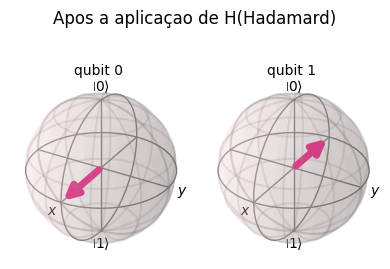

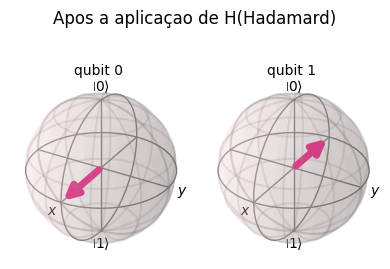

In [12]:
circuitH.h(qH[0])  # aplica a porta Z
circuitH.h(qH[1])  # aplica a porta Y
state_vector_hadamard_af = Statevector(circuitH)  # basicamente, wpega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_hadamard_af, figsize=(2, 2), title="Apos a aplicaçao de H(Hadamard)",
                       title_font_size=12)

###### Como a porta Hadamard "pensa"?
- Primeira linha: A nova amplitude de $|0\rangle$ sera a soma das amplitudes antigas.
- Segunda linha: A nova amplitude de $|1\rangle$ sera a subtraçao das amplitudes antigas.

- Se entrar como [1, 0] a soma é 1 e a subtraçao é 1 entao $|+\rangle$, ou [1, 1]
- Se entrar como [0, 1] a soma é 1 e a subtraçao é -1 entao $|-\rangle$, ou [1, -1]
- $|+\rangle$ e $|-\rangle$ são relativos ao Eixo que esta apontando.


Um fato interessante é que a porta Hadamard pode ser combinada com a porta Z para formar a porta X, e combinada com a X para formar a porta Z, usando as seguintes sequencias.

- $ X = HZH $
- $ Z = HXH $

Essas combinaçoes sao bem uteis quando formor criar portas que nao estao presentes por padrão no Qiskit.

#### Desenhando Circuitos Quanticos
Assim como as portas logicas classicas são combinadas para formar os circuitos logicos, nos podemos fazer o mesmo com as portas logicas quanticas.
Após a construçao do circuito é possivel desenhar ele.

##### Circuito porta NOT(X).

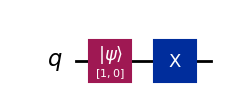

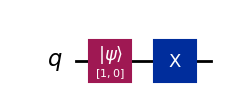

In [19]:
circuitNot.draw(output='mpl')

##### Circuito porta ZY.

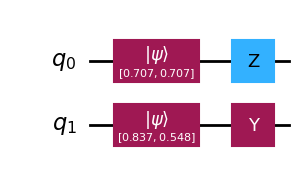

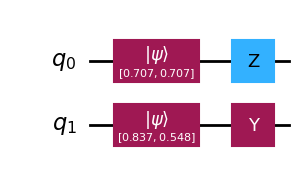

In [20]:
circuitZY.draw(output='mpl')

Circuito porta Hadamard(H).

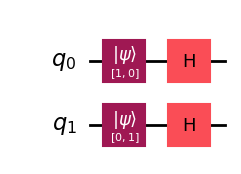

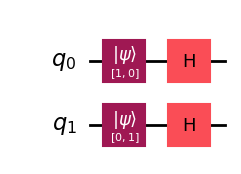

In [21]:
circuitH.draw(output='mpl')

Cada bloco, H, X, Y e Z representa uma das portas de 1 qubit usadas ate o momento.

#### Portas de múltiplosqubits
Parte das vantagens da computaçao quantica vem quando trabalhados com circuitos de multiplos qubits.

Como analisado anteriormente, o estado de 1-qubit tem duas amplitudes complexas ${\alpha,\beta}$, que é definido em um espaço de Hilbert, aonde o modulo ao quadrado corresponde as amplitudes de probabilidades dos estados. Podendo ser ${|0\rangle,|1\rangle}$.

Neste caso, da mesma forma que na computaçao classica, 2 bits tem 4 possiveis combinaçoes, os Qubits também tem a mesma equivalencia: ${|00\rangle,|01\rangle,|10\rangle,|11\rangle}$. De maneira geral, um sistema de N-qubits é descrito por um estado quantico.
$$
|\Psi\rangle = c_1 |0\dots00\rangle + c_2 |0\dots01\rangle + c_3 |00\dots10\rangle + \dots + c_{2^N} |1\dots11\rangle
$$
onde N-qubits sao considerados como um unico sistema composto de $2^N$ estados na sua base, com
$$
\sum_{i=1}^{2^N} |c_i|^2 = 1
$$

Formula 1 descreve o estado geral de $|\Psi\rangle$ de um sistema de N qubits como um combinaçao linear de todos os $2^N$ estados possiveis. Formula 2 é a normalizaçao, garantindo que a soma das probabilidades alcance 1(ou 100%)

##### Porta CNOT(CX)
Uma das portas mais importantes é a porta CNOT, ou NOT Controlado, CX. A porta CNOT é uma porta de dois qubits, a atuaçao so ocorre em casos aonde o qubit, que tem o nome de qubit de controle, tiver o valor $|1\rangle$. Nesse caso, atua-se a porta NOT no estado do outro qubit, que seria o alvo.
A sua representaçao matricial é:
$$
    CNOT =
        \begin{pmatrix}
            1 & 0 & 0 & 0 \\
            0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 1 \\
            0 & 0 & 1 & 0 \\
        \end{pmatrix}
$$

Considerando os estados da base computacional para dois qubits: ${|00\rangle,|01\rangle,|10\rangle,|11\rangle}$, a atuaçao da porta CNOT é: (Assumindo que o primeiro qubit é o de controle e o segundo o alvo)
$$ CNOT|00\rangle = |00\rangle$$
$$ CNOT|01\rangle = |01\rangle$$
$$ CNOT|10\rangle = |11\rangle$$
$$ CNOT|11\rangle = |10\rangle$$

###### Explicando matematicamente
Lembrando da base de tudo, a regra para um unico qubit é:
- se for $|0\rangle$ é o vetor que possui 1 na primeira posiçao $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$
- se for $|1\rangle$ é o vetor que possui 1 na segunda posiçao $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$

A questão é como juntar o vetor do primeiro com o seguindo qubit para criar um vetor que poderia representar um sistema de 2 qubits?
A resposta é uma operaçao matematica chamada de **Produto Tensorial**
A regra para fazer o produto tensorial entre $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ e $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, é a seguinte:
1. Pegue o primeiro numero do primeiro vetor (1)
2. Multiplique (1) pelo segundo vetor inteiro.
3. Pegue o segundo numero do primeiro vetor(0).
4. Multiplique o segundo numero(0) pelo segundo vetor inteiro.
5. Junte tudo em um unico vetor coluna

$$
    \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes
        \begin{pmatrix} 0 \\ 1 \end{pmatrix}
            = \begin{pmatrix} 1\begin{pmatrix} 0 \\ 1\end{pmatrix} \\ 0\begin{pmatrix} 0 \\ 1\end{pmatrix} \end{pmatrix}
                = \begin{pmatrix} 10 \\ 11 \\ 00 \\ 01 \end{pmatrix}
$$

Neste caso, para cada vetor de $|00\rangle, |01\rangle, |10\rangle\ e\ |11\rangle$ temos que:
$$
    |0\rangle \otimes |0\rangle
            = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix}
                = \begin{pmatrix} 1 \begin{pmatrix} 1\\0 \end{pmatrix} 0 \begin{pmatrix} 1\\0 \end{pmatrix} \end{pmatrix}
                = \begin{pmatrix} 1 \times 1\\1 \times 0\\0 \times 1\\0 \times 0 \end{pmatrix}
                = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$
Para o vetor de $|01\rangle$
$$
    |0\rangle \otimes |1\rangle
    = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix}
    = \begin{pmatrix} 1 \begin{pmatrix} 0\\1 \end{pmatrix} 0 \begin{pmatrix} 0\\1 \end{pmatrix} \end{pmatrix}
    = \begin{pmatrix} 1 \times 0\\1 \times 1\\0 \times 0\\0 \times 1 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
$$
Para o vetor de $|10\rangle$
$$
    |1\rangle \otimes |0\rangle
    = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix}
    = \begin{pmatrix} 0 \begin{pmatrix} 1\\0 \end{pmatrix} 1 \begin{pmatrix} 1\\0 \end{pmatrix} \end{pmatrix}
    = \begin{pmatrix} 0 \times 1\\0 \times 0\\1 \times 1\\1 \times 0 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}
$$
Para o vetor de $|11\rangle$
$$
    |1\rangle \otimes |1\rangle
    = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix}
    = \begin{pmatrix} 0 \begin{pmatrix} 0\\1 \end{pmatrix} 1 \begin{pmatrix} 0\\1 \end{pmatrix} \end{pmatrix}
    = \begin{pmatrix} 0 \times 0\\0 \times 1\\1 \times 0\\1 \times 1 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}
$$


##### Porta CNOT(código)
A porta CNOT pode ser implementado em um circuito com o qubit[0] sendo o de controle e o qubit[1] sendo o alvo.

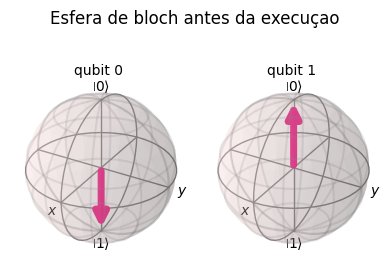

In [33]:
qCNOT = QuantumRegister(2, 'q')
circuitCNOT = QuantumCircuit(qCNOT)
circuitCNOT.initialize([0, 1], qCNOT[0])
circuitCNOT.initialize([1, 0], qCNOT[1])
state_vector_CNOT = Statevector(circuitCNOT)
plot_bloch_multivector(state_vector_CNOT, title="Esfera de bloch antes da execuçao", title_font_size=12, figsize=(2, 2))
circuitCNOT.cx(qCNOT[0], qCNOT[1])

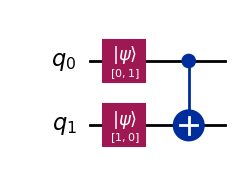

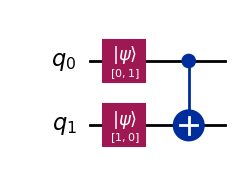

In [35]:
circuitCNOT.draw(output='mpl')

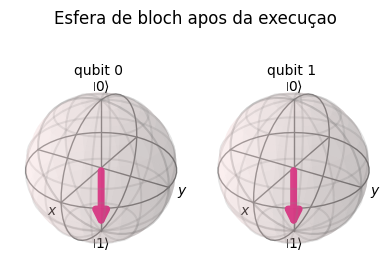

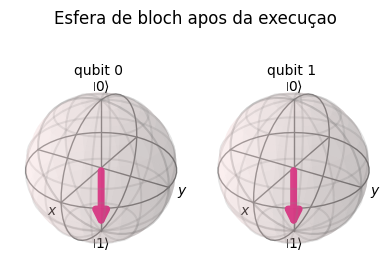

In [37]:
state_vector_CNOT = Statevector(circuitCNOT)
plot_bloch_multivector(state_vector_CNOT, title="Esfera de bloch apos da execuçao", title_font_size=12, figsize=(2, 2))

##### Porta Toffoli (CCX)
Uma das portas de multiplos qubits presente em varios circuitos é a porta Toffoli(CCX). Esta porta atua executando a porta NOT no qubit alvo caso os dois primeiro qubits de controle estejam como $|1\rangle$, neste caso, é uma porta de 3 qubits. Matricialmente:
$$
    CCX =
        \begin{pmatrix}
            10000000\\
            01000000\\
            00100000\\
            00010000\\
            00001000\\
            00000100\\
            00000001\\
            00000010\\
        \end{pmatrix}
$$

Esta porta pode ser implementada usando o qubit[0] e o qubit[1] como controle e o qubit[2] como alvo.


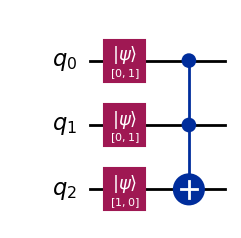

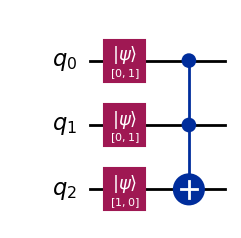

In [41]:
qCCX = QuantumRegister(3, 'q')
circuitCCX = QuantumCircuit(qCCX)
circuitCCX.initialize([0, 1], qCCX[0]) # |1>
circuitCCX.initialize([0, 1], qCCX[1]) # |1>
circuitCCX.initialize([1, 0], qCCX[2]) # |0>
circuitCCX.ccx(qCCX[0], qCCX[1], qCCX[2])
circuitCCX.draw(output='mpl')

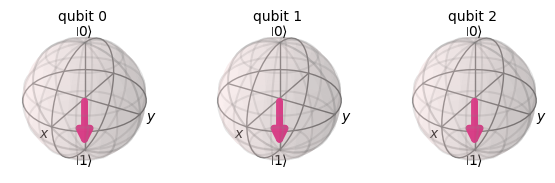

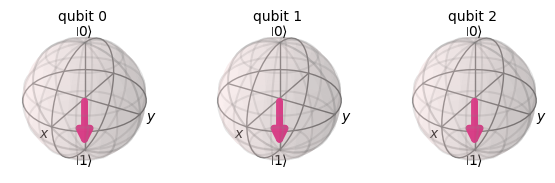

In [42]:
state_vector_CCCX = Statevector(circuitCCX)
plot_bloch_multivector(state_vector_CCCX, figsize=(2, 2))


# Medidas e distribuiçoes de probabilidade.